In [275]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns; sns.set()
import pandas
import APFcommonstuff as APF
from sklearn import linear_model
from sklearn.decomposition import PCA

In [6]:
# importantly, this correlation analysis must have cleaned data to be useful. 
data = pandas.read_csv('final_data_cleaned_fixed_starIDs.csv')

PCA for HD10700_APF.vels
17 principle components required for 95% accuracy.


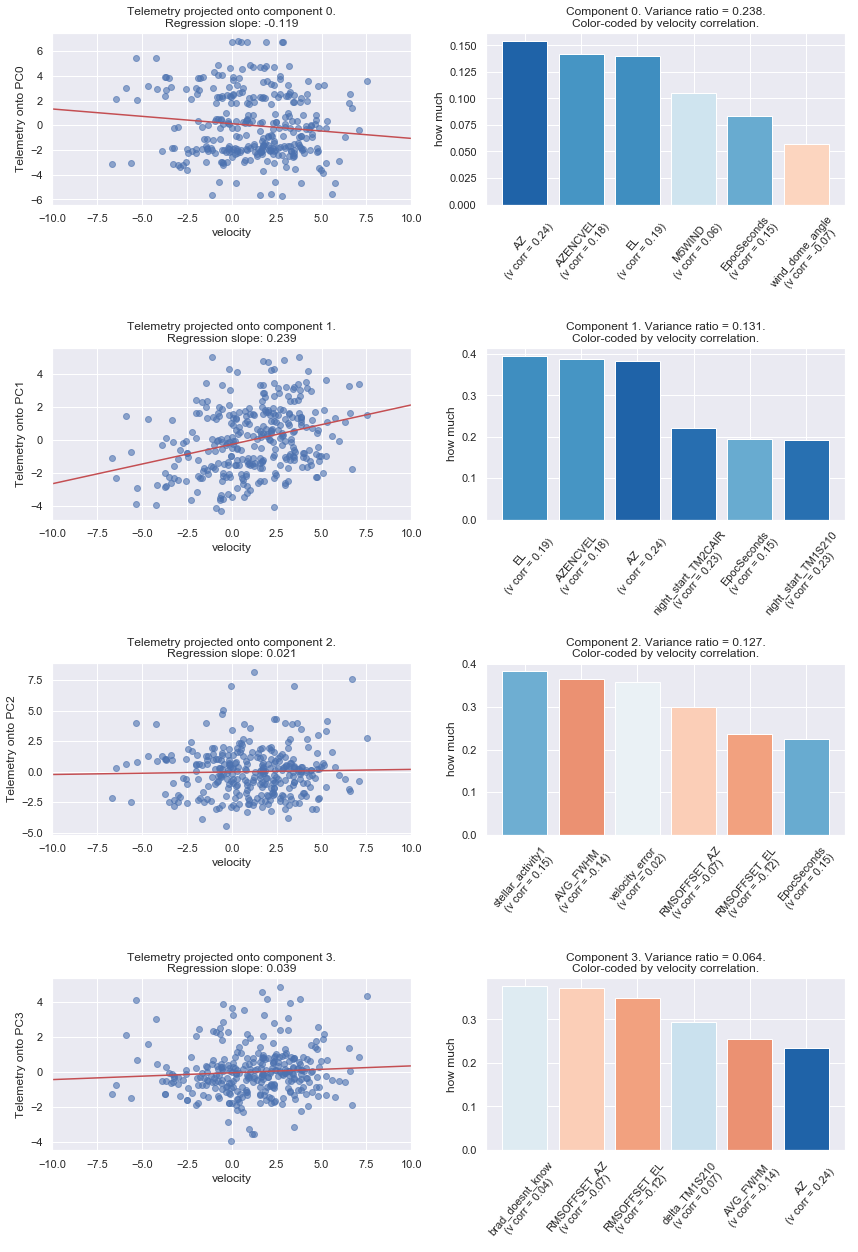

In [305]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color='b')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

def do_PCR_make_plots(data, columns, n_components, n_plots, starID, print_level=0):
    velocity_correlations = data.loc[data['starID_corrected'] == starID].corr()['velocity']
    if print_level > 1:
        print(velocity_correlations[columns])
    X = data.loc[data['starID_corrected'] == starID][columns]
    velocity = data.loc[data['starID_corrected'] == starID]['velocity']

    # normalize data by substracting avg; scaling each column to have std = 1.
    X = X.divide(X.std())
    X = X.subtract(X.mean())

    pca = PCA(0.95)#n_components=n_components)
    pca.fit(X)
    principle_components = pca.components_
    print('PCA for {}'.format(starID))
    print("{} principle components required for 95% accuracy.".format(len(principle_components)))
    
    projected = np.dot(X, principle_components.T)

    
    fig, axarr = plt.subplots(n_plots, 2)
    for row in range(n_plots):
        
        #scatter portion.
        ax = axarr[row, 0]
        y = projected[:, row]; x = velocity
        model = linear_model.LinearRegression(fit_intercept=True)

        model.fit(x[:, np.newaxis], y)

        xfit = np.linspace(-10, 10, 1000)
        yfit = model.predict(xfit[:, np.newaxis])

        ax.scatter(x, y, alpha=0.6)
        ax.plot(xfit, yfit, c='r');
        
        ax.set_title('Telemetry projected onto component {}.\nRegression slope: {}'.format(row, round(model.coef_[0], 3)))
        ax.set_ylabel('Telemetry onto PC{}'.format(row)); ax.set_xlabel('velocity')
        ax.set_xlim(-10,10)
        
        # bar portion.
        ax = axarr[row, 1]
        ax.set_title("Component {}. Variance ratio = {}.\nColor-coded by velocity correlation.".format(row,
                                    round(pca.explained_variance_ratio_[row], 3)))
        df = pandas.DataFrame({'coefficient': pca.components_[row],
                                'column': columns})
        df.sort_values('coefficient', ascending=False, inplace=True)
        column_ticks = ['{}\n(v corr = {})'.format(a, b) for a, b in zip(df['column'][:n_components],
                                round(velocity_correlations[df['column'][:n_components]], 2))]
        if print_level > 1:
            print(column_ticks)
            break
        norm = mpl.colors.Normalize(vmin=-.3, vmax=.3)
        cmap = cm.RdBu
        m = cm.ScalarMappable(norm=norm, cmap=cmap)
        cs = ax.bar(range(n_components), df['coefficient'][:n_components],
              tick_label=column_ticks, 
                color=m.to_rgba(velocity_correlations[df['column'][:n_components]]))
        ax.set_ylabel('how much')

        #ax.tick_params(labelrotation=70)
        for tick in ax.get_xticklabels():
            tick.set_rotation(50)
    
    fig.set_figheight(15)
    fig.set_figwidth(12)
    #fig.suptitle('PCA for {}'.format(starID), size=16)
    plt.tight_layout(rect=[0, 0.03, 1, float(n_plots) * 0.3])
    #plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    
    if print_level > 1.:
        for vector, ratio in zip(pca.components_, pca.explained_variance_ratio_):
            print("ratio: {}".format(ratio))
            #print(vector)
            df = pandas.DataFrame({'coefficient': vector,
                                'column': columns })
            print(df.sort_values('coefficient', ascending=False)[:10])
    
    # plot data
    #plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
    #for length, vector in zip(pca.explained_variance_, pca.components_):
    #    v = vector * 3 * np.sqrt(length)
    #    draw_vector(pca.mean_, pca.mean_ + v)
    #plt.axis('equal');
    
    
columns = ['EpocSeconds','velocity_error', 
                'stellar_activity1','total_counts','brad_doesnt_know',
                'AZ', 'EL', 'AZENCVEL', 'ELENCVEL', 'AZFLWERR', 'ELFLWERR',
                 'AVG_FWHM','M5WIND', 'M5WINDAZ', 'TAVERAGE', 'TM1S210',
                 'TM2CAIR', 'OFFSET_AZ', 'OFFSET_EL','RMSOFFSET_AZ', 'RMSOFFSET_EL', 
                 'AVGOFFSET_AZ', 'AVGOFFSET_EL', 'night_start_temperature', 
                 'night_start_TM1S210','night_start_TM2CAIR', 'delta_TAVERAGE', 'delta_TM1S210',
       'delta_TM2CAIR', 'wind_dome_angle']
columns2 = ['TAVERAGE', 'TM1S210']
do_PCR_make_plots(data, columns, n_components=6, n_plots=4, starID='HD10700_APF.vels', print_level=0)

PCA for HD185144_APF.vels
16 principle components required for 95% accuracy.


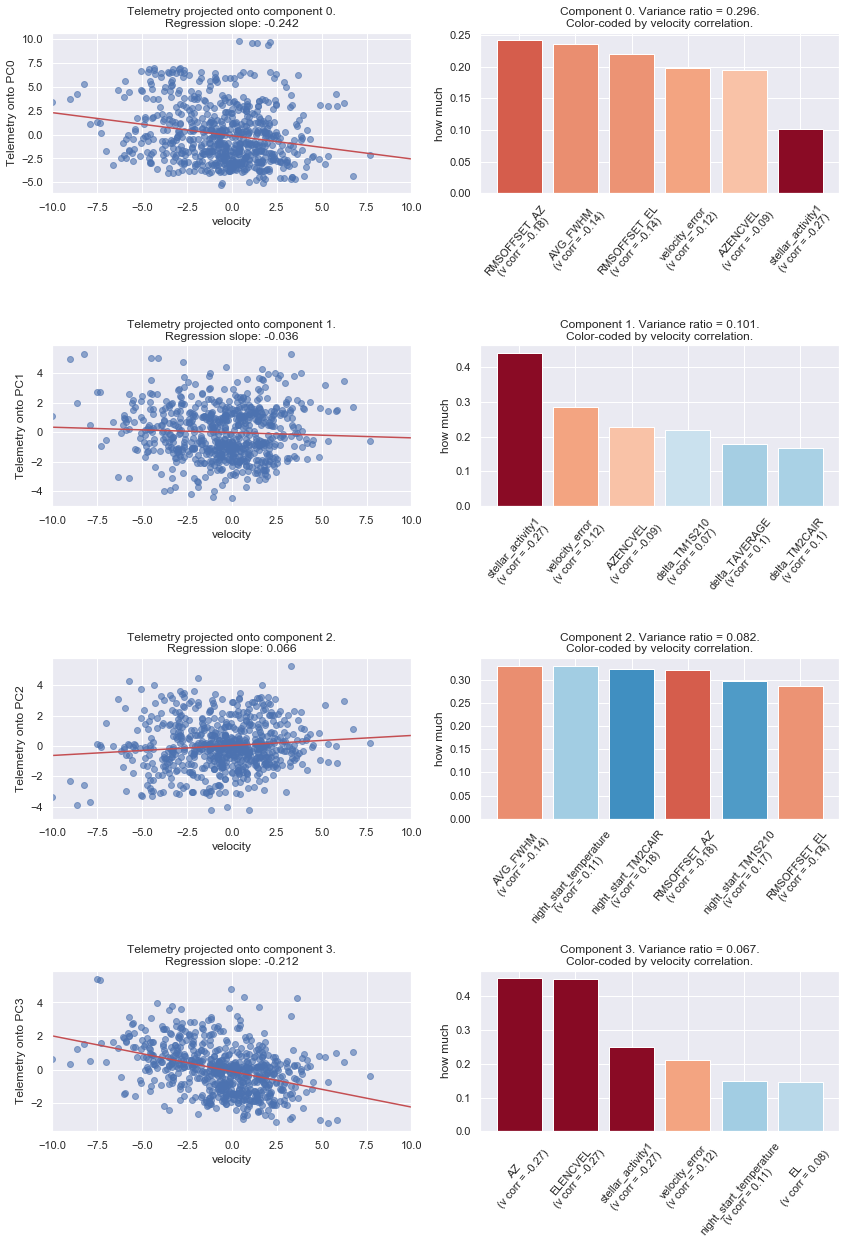

In [306]:
do_PCR_make_plots(data, columns, n_components=6, n_plots=4, starID='HD185144_APF.vels')

PCA for HD9407_APF.vels
16 principle components required for 95% accuracy.


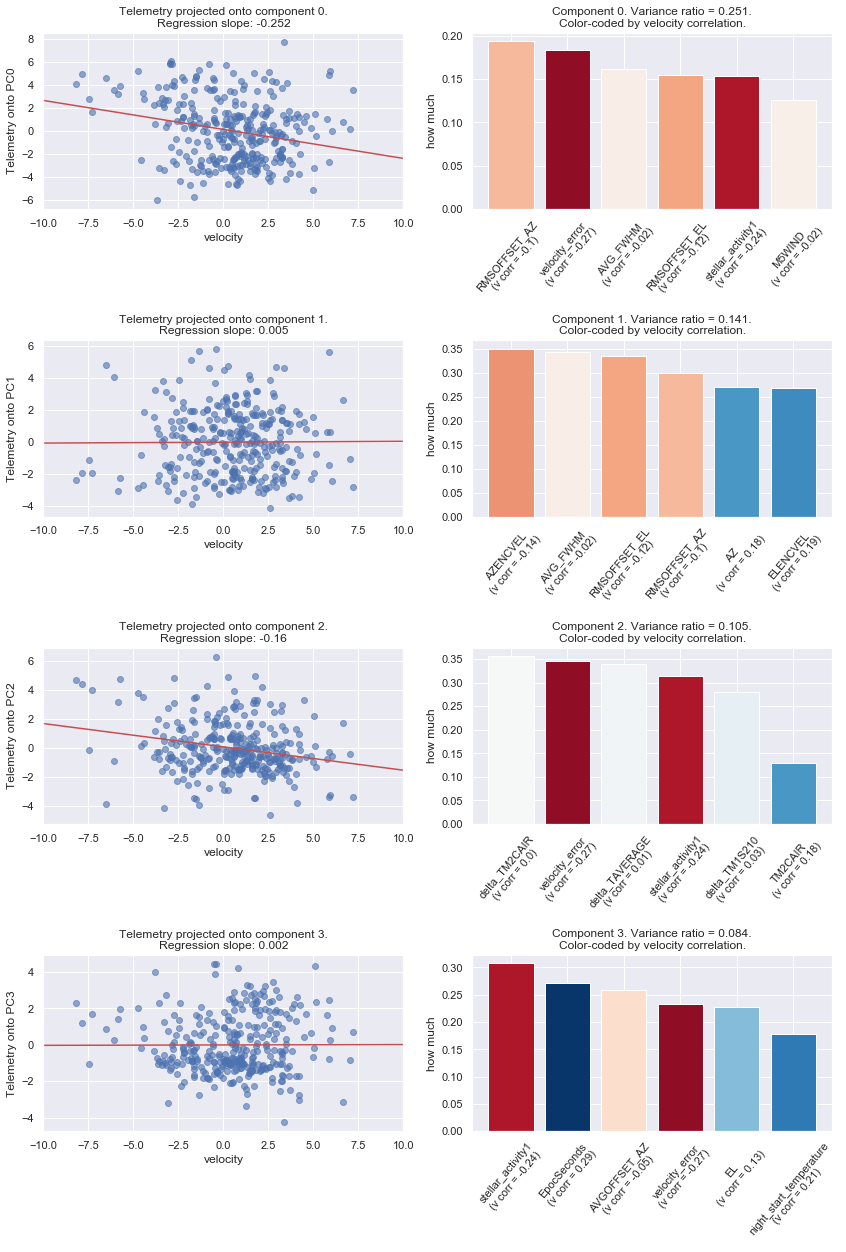

In [307]:
do_PCR_make_plots(data, columns, n_components=6, n_plots=4, starID='HD9407_APF.vels')

In [208]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(a)
a[1, :2]

round(1.00002, 2)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


1.0

In [56]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

(1797, 64)
(1797, 2)


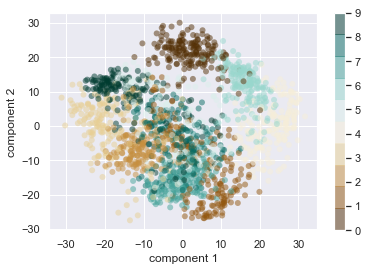

In [64]:
def jvdp():
    pca = PCA(2)  # project from 64 to 2 dimensions
    projected = pca.fit_transform(digits.data)
    print(digits.data.shape)
    print(projected.shape)
    plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('BrBG', 10))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.colorbar();
    
jvdp()